# Housing Example

## imports

In [143]:
import tarfile
import urllib.request
from pathlib import Path

import polars as pl
# import matplotlib as plt

## Functions

In [144]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pl.read_csv(Path("datasets/housing/housing.csv"))

## Data

In [145]:
housing = load_housing_data()

housing.head()

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,"""NEAR BAY"""
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,"""NEAR BAY"""
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,"""NEAR BAY"""
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,"""NEAR BAY"""
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,"""NEAR BAY"""


In [146]:
housing.glimpse()

Rows: 20640
Columns: 10
$ longitude          <f64> -122.23, -122.22, -122.24, -122.25, -122.25, -122.25, -122.25, -122.25, -122.26, -122.25
$ latitude           <f64> 37.88, 37.86, 37.85, 37.85, 37.85, 37.85, 37.84, 37.84, 37.84, 37.84
$ housing_median_age <f64> 41.0, 21.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 42.0, 52.0
$ total_rooms        <f64> 880.0, 7099.0, 1467.0, 1274.0, 1627.0, 919.0, 2535.0, 3104.0, 2555.0, 3549.0
$ total_bedrooms     <f64> 129.0, 1106.0, 190.0, 235.0, 280.0, 213.0, 489.0, 687.0, 665.0, 707.0
$ population         <f64> 322.0, 2401.0, 496.0, 558.0, 565.0, 413.0, 1094.0, 1157.0, 1206.0, 1551.0
$ households         <f64> 126.0, 1138.0, 177.0, 219.0, 259.0, 193.0, 514.0, 647.0, 595.0, 714.0
$ median_income      <f64> 8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912
$ median_house_value <f64> 452600.0, 358500.0, 352100.0, 341300.0, 342200.0, 269700.0, 299200.0, 241400.0, 226700.0, 261100.0
$ ocean_proximity    <str> 'NEAR BAY', 'NEAR BAY'

In [147]:
housing.describe()

statistic,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""count""",20640.0,20640.0,20640.0,20640.0,20433.0,20640.0,20640.0,20640.0,20640.0,"""20640"""
"""null_count""",0.0,0.0,0.0,0.0,207.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.53968,3.870671,206855.816909,null
"""std""",2.003532,2.135952,12.585558,2181.615252,421.38507,1132.462122,382.329753,1.899822,115395.615874,null
"""min""",-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0,"""<1H OCEAN"""
"""25%""",-121.8,33.93,18.0,1448.0,296.0,787.0,280.0,2.5637,119600.0,null
"""50%""",-118.49,34.26,29.0,2127.0,435.0,1166.0,409.0,3.5349,179700.0,null
"""75%""",-118.01,37.71,37.0,3148.0,647.0,1725.0,605.0,4.7431,264700.0,null
"""max""",-114.31,41.95,52.0,39320.0,6445.0,35682.0,6082.0,15.0001,500001.0,"""NEAR OCEAN"""


In [148]:
housing.group_by(pl.col("ocean_proximity")).len("n").sort("n", descending=True)

ocean_proximity,n
str,u32
"""<1H OCEAN""",9136
"""INLAND""",6551
"""NEAR OCEAN""",2658
"""NEAR BAY""",2290
"""ISLAND""",5


array([[<Axes: title={'center': 'longitude'}>, <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>, <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>, <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

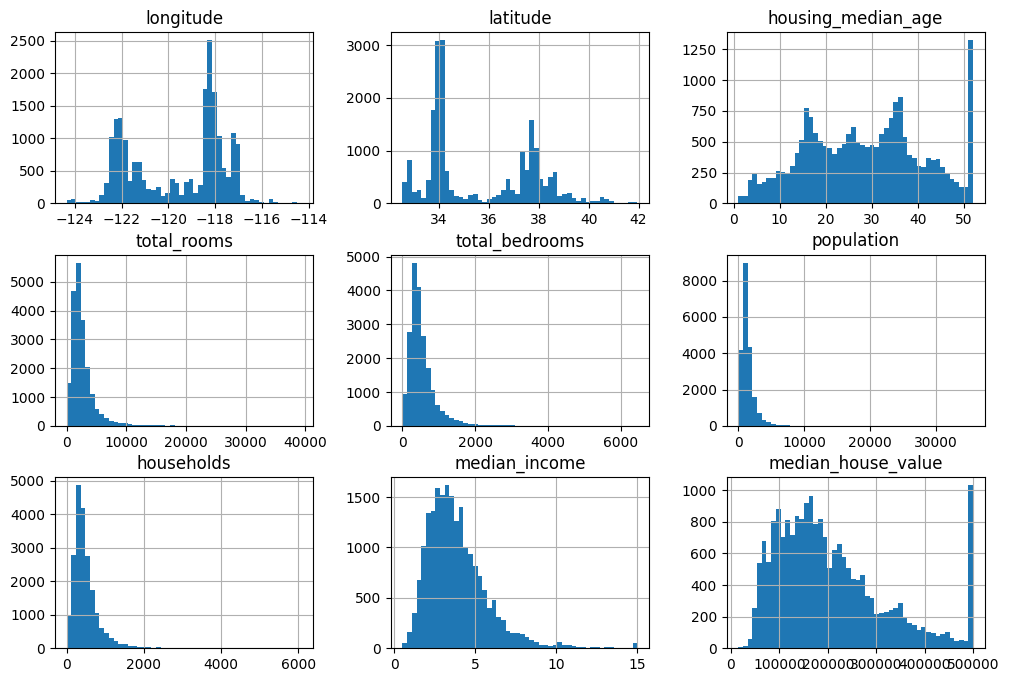

In [149]:
housing.to_pandas().hist(bins=50, figsize=(12, 8))

In [150]:
from sklearn.model_selection import train_test_split


In [151]:
train_set, test_set = train_test_split(housing, test_size =0.2,   random_state=42)

In [152]:
breaks=[1.5, 3.0, 4.5, 6]
labels = ["1","2","3","4","5"]

housing = (
    housing.with_columns(
        pl.col("median_income")
        .cut(breaks=breaks, labels=labels)
        .alias("income_cat")
    )
)


In [153]:
housing.select(pl.col("income_cat")).group_by(pl.col("income_cat")).len().sort(pl.col("income_cat")).plot.bar(
    x="income_cat", y = "len"
)

alt.Chart(...)

In [154]:
strat_train_set, strat_test_set = train_test_split(
    housing, 
    test_size=0.2, 
    stratify=housing.select("income_cat"), 
    random_state =42
)

In [155]:
length = len(strat_test_set)
(
    strat_test_set
    .group_by("income_cat")
    .len()
    .with_columns(
        pl.col("len").truediv(length).alias("prop")
    )
    .sort("income_cat")
)


income_cat,len,prop
cat,u32,f64
"""1""",165,0.039971
"""2""",1316,0.318798
"""3""",1447,0.350533
"""4""",728,0.176357
"""5""",472,0.114341


polars.dataframe.frame.DataFrame

In [156]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop_in_place("income_cat")

## Exploring the Data

In [157]:
housing = strat_train_set
housing

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
-122.42,37.8,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,"""NEAR BAY"""
-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,"""<1H OCEAN"""
-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.433,101700.0,"""INLAND"""
-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,"""INLAND"""
-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,"""NEAR OCEAN"""
…,…,…,…,…,…,…,…,…,…
-118.4,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,"""<1H OCEAN"""
-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,"""INLAND"""
-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,"""NEAR OCEAN"""


In [158]:
chart = (
    housing
    .sample(5000)
    .plot
    .point(
        x="longitude",
        y="latitude",
    )
)
chart

alt.Chart(...)

In [159]:
housing

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
-122.42,37.8,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,"""NEAR BAY"""
-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,"""<1H OCEAN"""
-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.433,101700.0,"""INLAND"""
-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,"""INLAND"""
-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,"""NEAR OCEAN"""
…,…,…,…,…,…,…,…,…,…
-118.4,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,"""<1H OCEAN"""
-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,"""INLAND"""
-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,"""NEAR OCEAN"""


In [160]:
corr_matrix = housing.drop("ocean_proximity")
corr_matrix = (
    corr_matrix
    .corr()
    .with_columns(
        index = pl.lit(pl.Series(corr_matrix.columns))
    )
    .unpivot(index = "index")
    .filter(pl.col("index") != pl.col("variable"))
)
corr_matrix

index,variable,value
str,str,f64
"""latitude""","""longitude""",-0.924213
"""housing_median_age""","""longitude""",-0.102937
"""total_rooms""","""longitude""",0.044558
"""total_bedrooms""","""longitude""",NaN
"""population""","""longitude""",0.104236
…,…,…
"""total_rooms""","""median_house_value""",0.137455
"""total_bedrooms""","""median_house_value""",NaN
"""population""","""median_house_value""",-0.020153


In [161]:
corr_matrix.filter(pl.col("index") == "median_house_value").sort("value", descending=True)

index,variable,value
str,str,f64
"""median_house_value""","""total_bedrooms""",NaN
"""median_house_value""","""median_income""",0.68838
"""median_house_value""","""total_rooms""",0.137455
"""median_house_value""","""housing_median_age""",0.102175
"""median_house_value""","""households""",0.071426
"""median_house_value""","""population""",-0.020153
"""median_house_value""","""longitude""",-0.050859
"""median_house_value""","""latitude""",-0.139584


In [162]:
housing=(
    housing
    .with_columns(
        rooms_per_house= pl.col("total_rooms") / pl.col("households"),
        bedrooms_ratio= pl.col("total_bedrooms") / pl.col("total_rooms"),
        people_per_house= pl.col("population") / pl.col("households")
    )
)

In [163]:
housing

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64
-122.42,37.8,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,"""NEAR BAY""",3.211799,0.335742,1.524178
-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,"""<1H OCEAN""",5.504202,0.180153,1.865546
-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.433,101700.0,"""INLAND""",5.334975,0.200369,2.768473
-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,"""INLAND""",5.351282,0.203881,2.365385
-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,"""NEAR OCEAN""",3.725256,0.277371,1.631399
…,…,…,…,…,…,…,…,…,…,…,…,…
-118.4,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,"""<1H OCEAN""",4.277247,0.266875,1.793499
-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,"""INLAND""",5.535714,0.201019,2.667293
-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,"""NEAR OCEAN""",5.157895,0.197704,3.702632


In [164]:
corr_matrix = housing.drop("ocean_proximity").drop_nulls()
corr_matrix = (
    corr_matrix
    .corr()
    .with_columns(
        index = pl.lit(pl.Series(corr_matrix.columns))
    )
    .unpivot(index = "index")
    .filter(pl.col("index") != pl.col("variable"))
)
corr_matrix

index,variable,value
str,str,f64
"""latitude""","""longitude""",-0.92425
"""housing_median_age""","""longitude""",-0.104176
"""total_rooms""","""longitude""",0.045697
"""total_bedrooms""","""longitude""",0.06821
"""population""","""longitude""",0.104972
…,…,…
"""households""","""people_per_house""",-0.042351
"""median_income""","""people_per_house""",-0.006671
"""median_house_value""","""people_per_house""",-0.037955


In [165]:
corr_matrix.filter(pl.col("index") == "median_house_value").sort("value", descending=True)

index,variable,value
str,str,f64
"""median_house_value""","""median_income""",0.68877
"""median_house_value""","""rooms_per_house""",0.143063
"""median_house_value""","""total_rooms""",0.136317
"""median_house_value""","""housing_median_age""",0.10278
"""median_house_value""","""households""",0.070102
…,…,…
"""median_house_value""","""population""",-0.021243
"""median_house_value""","""people_per_house""",-0.037955
"""median_house_value""","""longitude""",-0.049959


In [166]:
housing.describe()

statistic,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64
"""count""",16512.0,16512.0,16512.0,16512.0,16344.0,16512.0,16512.0,16512.0,16512.0,"""16512""",16512.0,16344.0,16512.0
"""null_count""",0.0,0.0,0.0,0.0,168.0,0.0,0.0,0.0,0.0,"""0""",0.0,168.0,0.0
"""mean""",-119.573125,35.637746,28.577156,2639.402798,538.949094,1425.513929,499.990189,3.870428,206333.518653,null,5.44101,0.212796,2.995974
"""std""",2.000624,2.133294,12.585738,2185.287466,423.862079,1094.795467,382.865787,1.891936,115314.047529,null,2.574143,0.057417,4.457373
"""min""",-124.35,32.55,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0,"""<1H OCEAN""",0.888889,0.1,0.692308
"""25%""",-121.8,33.93,18.0,1447.0,296.0,787.0,279.0,2.5625,119200.0,null,4.44364,0.175258,2.433498
"""50%""",-118.51,34.26,29.0,2125.0,434.0,1167.0,408.0,3.5385,179200.0,null,5.235632,0.203108,2.82241
"""75%""",-118.01,37.72,37.0,3154.0,645.0,1726.0,603.0,4.75,263900.0,null,6.053691,0.23942,3.286385
"""max""",-114.49,41.95,52.0,39320.0,6210.0,16305.0,5358.0,15.0001,500001.0,"""NEAR OCEAN""",141.909091,1.0,502.461538


Prep for ML

In [167]:
housing = strat_train_set.drop("median_house_value")
housing_labels = strat_train_set.select(pl.col("median_house_value"))

In [168]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [171]:
import polars.selectors as cs

housing_num = housing.select(cs.numeric())

In [173]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [174]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,  408.    ,    3.5385])

In [176]:
X = imputer.transform(housing_num)

In [177]:
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,  1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,  3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,  2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,  7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,  8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,  2.1200e+02,  3.2833e+00]], shape=(16512, 8))